# Exercise 1: Basic image processing

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

## a) Read the image

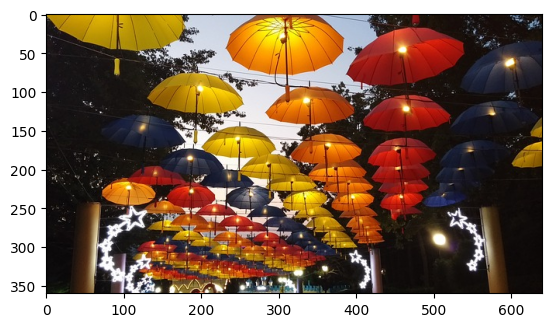

In [3]:
from UZ_utils import *
I = imread('images/umbrellas.jpg')
imshow(I)

## b) Convert to grayscale, c) Cut out a section

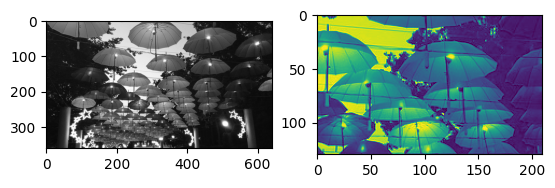

In [4]:
grayscale = (I[:, :, 0] + I[:, :, 1] + I[:, :, 2]) / 3
cutout=I[130:260, 240:450, 1]

plt.subplot(1, 2, 1)
plt.imshow(grayscale, cmap="gray")

plt.subplot(1, 2, 2)
plt.imshow(cutout, cmap="viridis")

plt.show()

A: Different color maps are used to more vividly represent the data. Eg. value 0.2 means different things if it represents grayscale pixel or green component of RGB pixel.

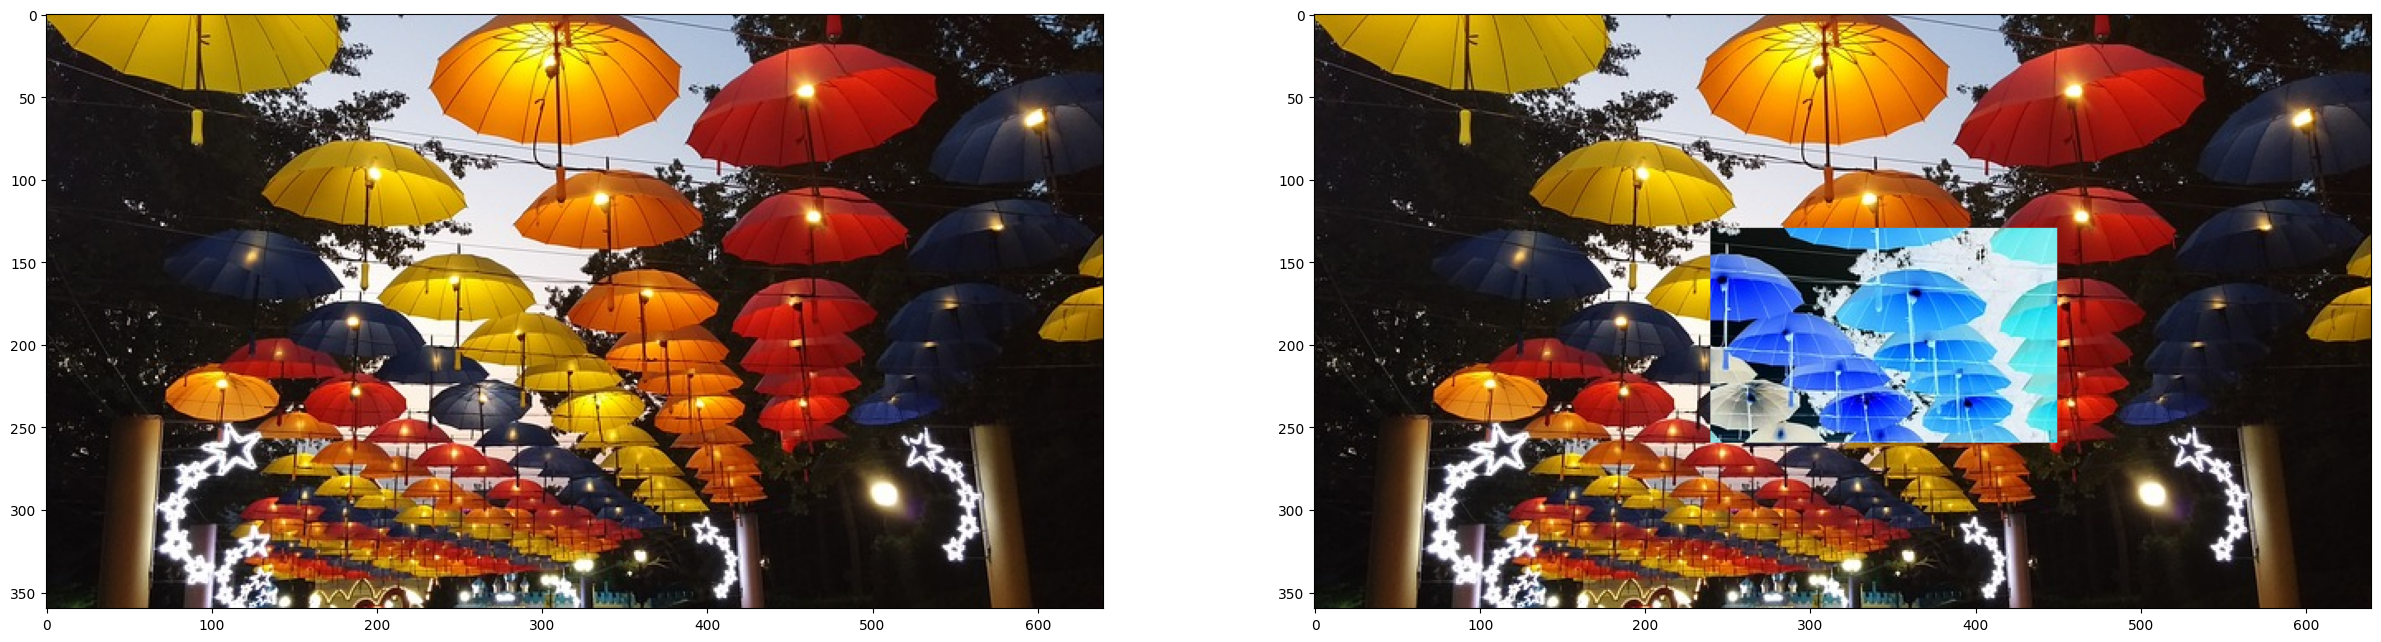

In [5]:
inverted_middle = I.copy()
inverted_middle[130:260, 240:450] = 1 - inverted_middle[130:260, 240:450]

plt.figure(figsize=(30,30))
plt.subplot(1, 2, 1)
plt.imshow(I)

plt.subplot(1, 2, 2)
plt.imshow(inverted_middle)

plt.show()

A: Inverting grayscale value is done by substracing pixel values from 1

## e) Remap grayscale

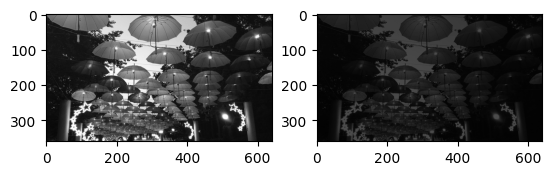

In [6]:
rescaled = grayscale * 0.3

plt.subplot(1, 2, 1)
plt.imshow(grayscale, cmap="gray")

plt.subplot(1, 2, 2)
plt.imshow(rescaled, cmap="gray", vmin=0, vmax=1)

plt.show()

# Exercise 2: Thresholding and histograms

## a) Binary mask

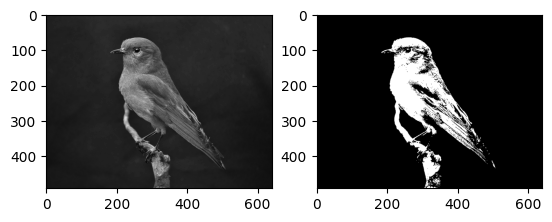

In [7]:
bird = imread_gray("images/bird.jpg")

threshold = 0.3
bird_mask = bird.copy()
bird_mask[bird_mask < threshold] = 0
bird_mask[bird_mask >= threshold] = 1

plt.subplot(1, 2, 1)
plt.imshow(bird, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(bird_mask, cmap="gray", vmin=0, vmax=1)

plt.show()

## b) Histogram

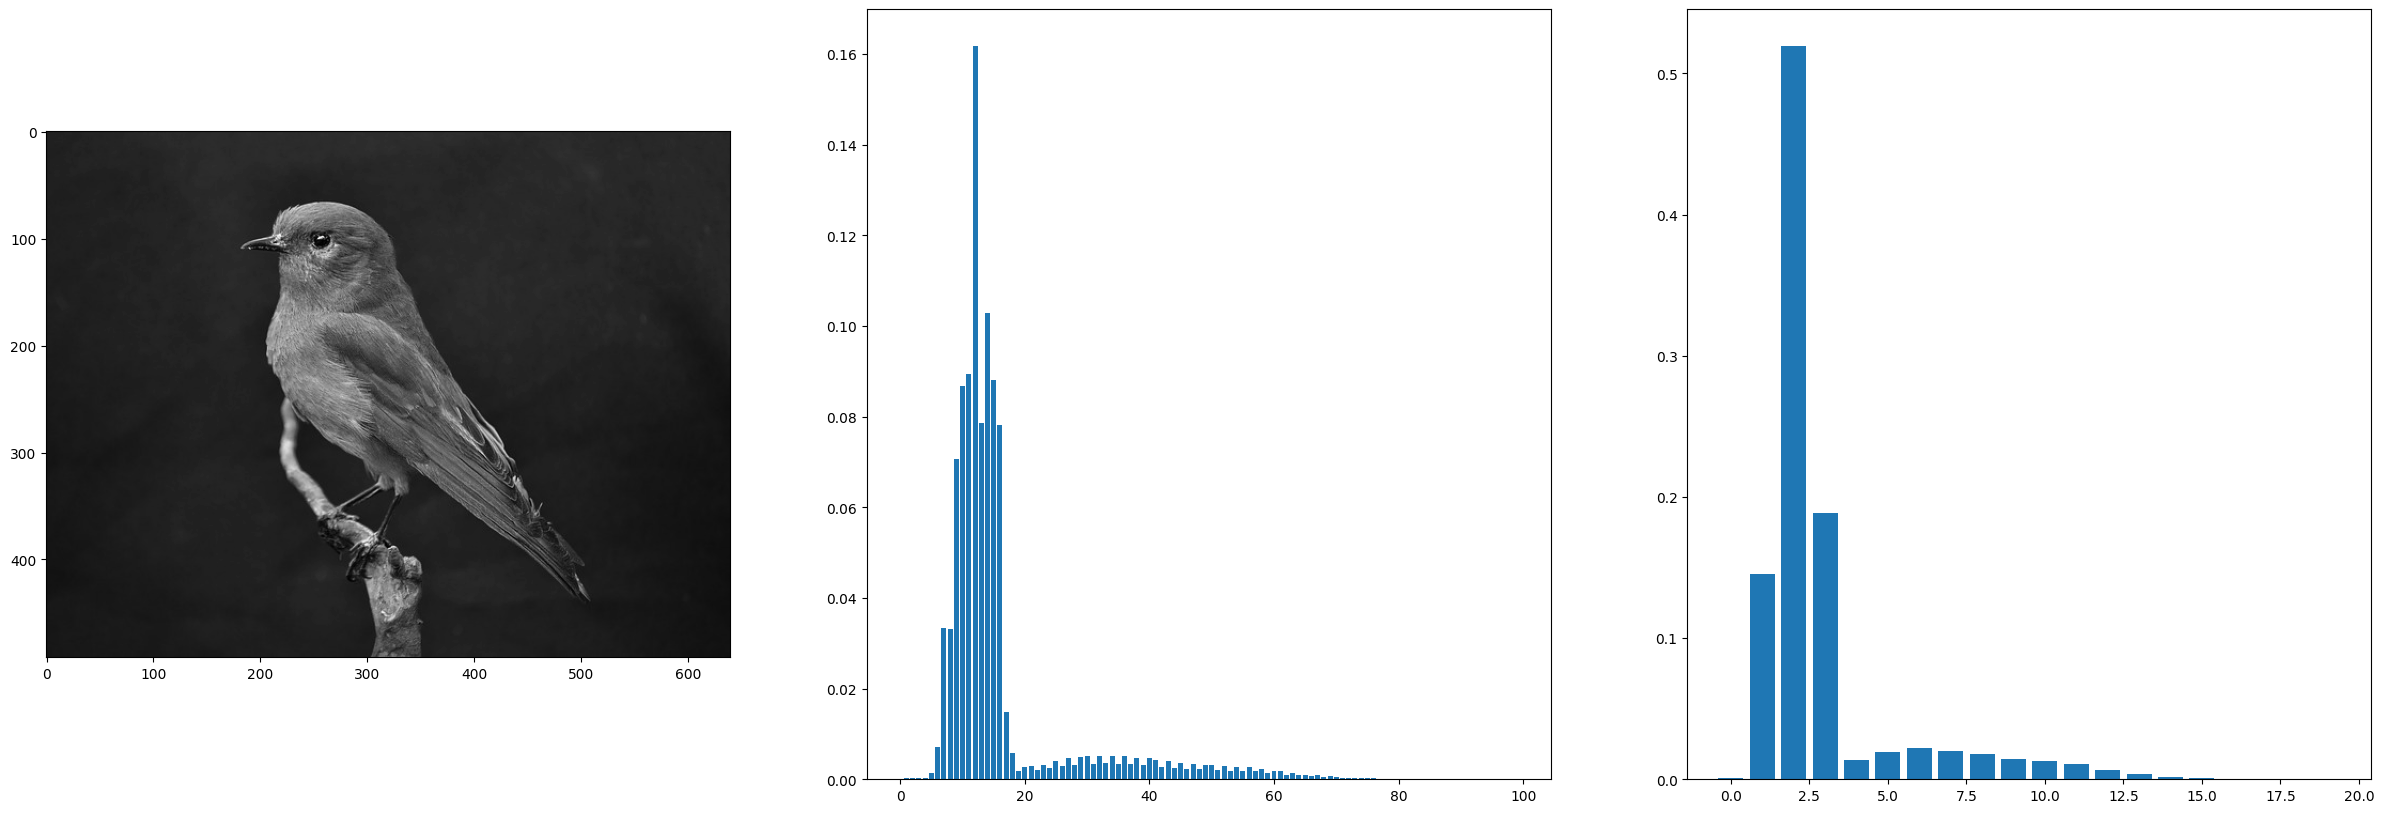

In [8]:
def myhist(img, bins):
    height, width = img.shape
    total = width * height
    step = 1 / bins
    
    H = np.array([np.sum((step*i <= img) & (img < step*(i+1)))/total for i in range(bins)])
    return H

plt.figure(figsize=(30,10))
plt.subplot(1, 3, 1)
plt.imshow(bird, cmap='gray')

plt.subplot(1, 3, 2)
plt.bar(range(100), myhist(bird, 100))

plt.subplot(1, 3, 3)
plt.bar(range(20), myhist(bird, 20))
plt.show()

A: We normalize to avoid having diffenrent histogram for images with different resolutions.

## c) Improved histogram

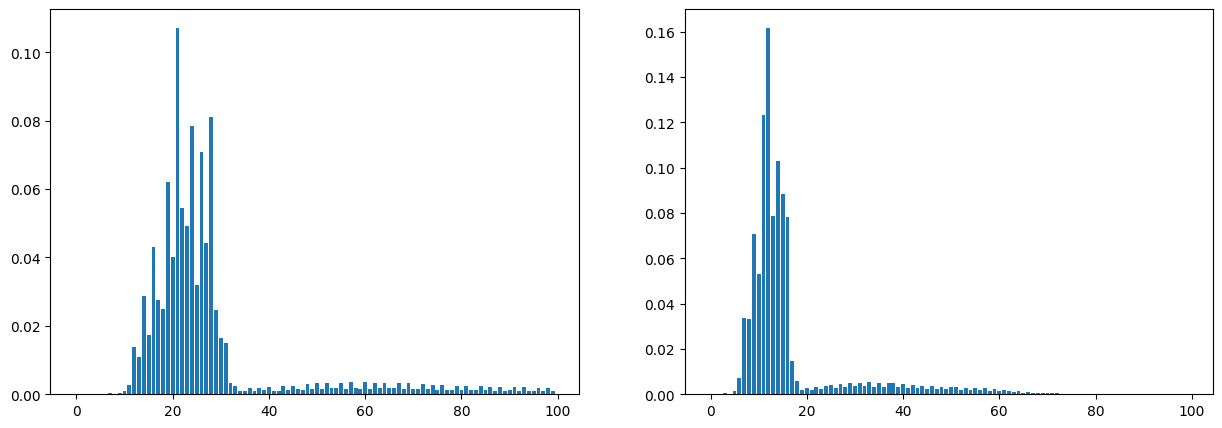

In [9]:
def myhist_improved(img, bins):
    height, width = img.shape
    total = width * height
    min = np.min(img)
    max = np.max(img)
    step = (max - min) / bins
    
    H = np.array([np.sum((step*i <= img) & (img < step*(i+1)))/total for i in range(bins)])
    return H

plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.bar(range(100), myhist(bird * 1.8, 100))
plt.subplot(1, 2, 2)
plt.bar(range(100), myhist_improved(bird * 1.8, 100))

plt.show()

## d) My pictures

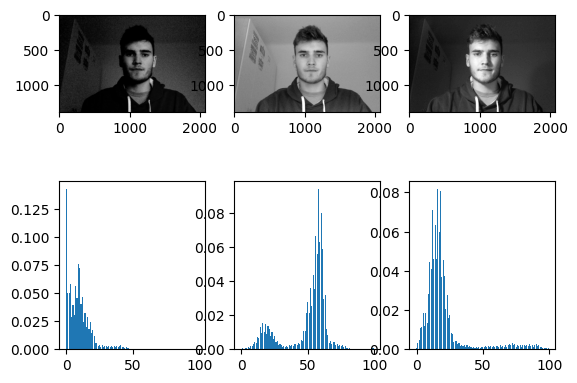

In [10]:
temna = imread_gray('my_images/temna.jpg')
navadna = imread_gray('my_images/navadna.jpg')
svetla = imread_gray('my_images/svetla.jpg')

plt.subplot(2, 3, 1)
plt.imshow(temna, cmap='gray')
plt.subplot(2, 3, 4)
plt.bar(range(100), myhist(temna, 100))

plt.subplot(2, 3, 2)
plt.imshow(navadna, cmap='gray')
plt.subplot(2, 3, 5)
plt.bar(range(100), myhist(navadna, 100))

plt.subplot(2, 3, 3)
plt.imshow(svetla, cmap='gray')
plt.subplot(2, 3, 6)
plt.bar(range(100), myhist(svetla, 100))

plt.show()

## e) Otsu

In [11]:
def otsu(img):
    # num of pixels below and above tresh
    l = 0
    r = 0
    # sum of pixels below and above tresh
    l_sum = 0
    r_sum = 0
    
    # histogram
    n_val = 256
    hist = np.zeros(n_val)
    for v in img.reshape(-1):
        hist[v] += 1
        r += 1
        r_sum += v

    # loop through all possible thresholds, maximize variance
    max_variance = 0
    best_threshold = 0
    for tresh in range(n_val):
        l += hist[tresh]
        r -= hist[tresh]
        l_sum += hist[tresh] * tresh
        r_sum -= hist[tresh] * tresh

        if l == 0 or r == 0:
            continue

        l_median = l_sum / l
        r_median = r_sum / r

        variance = l * r * (l_median - r_median) ** 2

        if variance > max_variance:
            max_variance = variance
            best_threshold = tresh

    return best_threshold


190


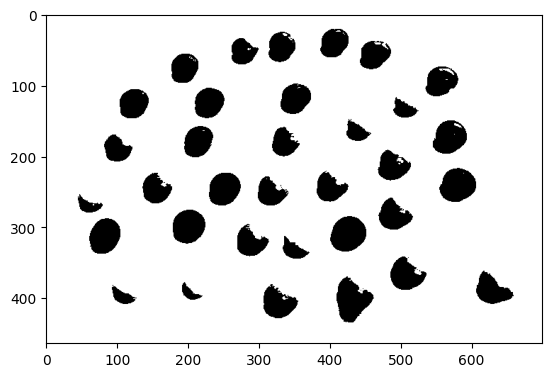

In [13]:
bird_2 = np.array(Image.open("images/candy.jpg").convert("L"))
threshold_2 = otsu(bird_2)
print(threshold_2)
bird_2[bird_2 < threshold_2] = 0
bird_2[bird_2 >= threshold_2] = 1

plt.imshow(bird_2, cmap='gray')

plt.show()

# Exercise 3: Morphological operations and regions

## a) Erosion, Dilation

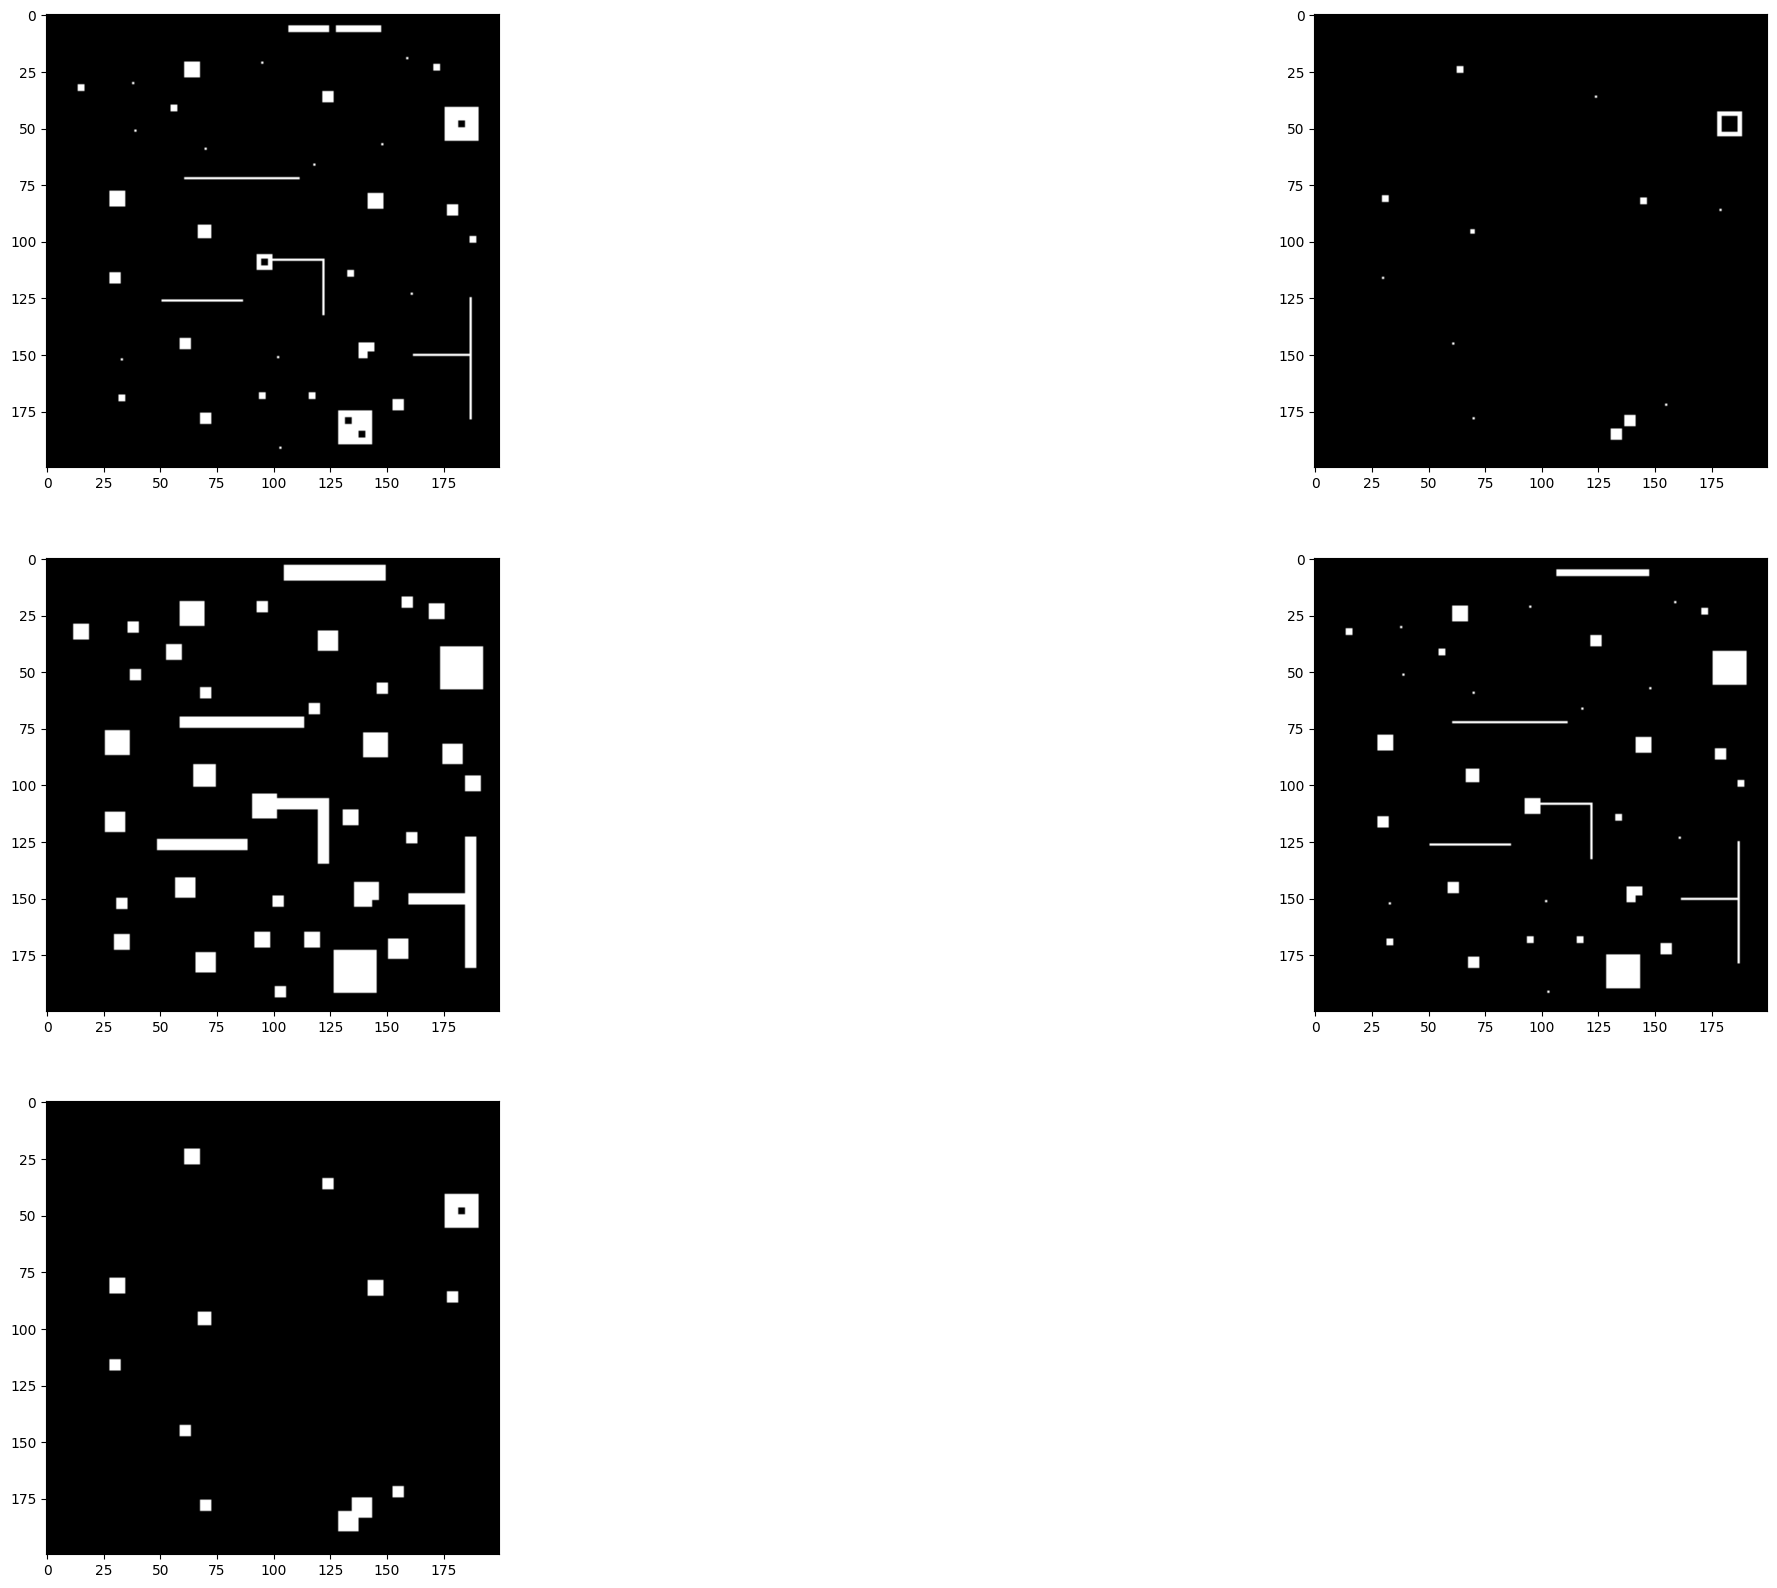

In [23]:
mask = imread_gray("images/mask.png")

n=5
SE = np.ones((n,n)) # create a square structuring element
mask_eroded = cv2.erode(mask, SE)
mask_dilated = cv2.dilate(mask, SE)

mask_opened = cv2.dilate(cv2.erode(mask, SE), SE)
mask_closed = cv2.erode(cv2.dilate(mask, SE), SE)

plt.figure(figsize=(30,20))
plt.subplot(3, 2, 1)
plt.imshow(mask, cmap='gray')
plt.subplot(3, 2, 2)
plt.imshow(mask_eroded, cmap='gray')
plt.subplot(3, 2, 3)
plt.imshow(mask_dilated, cmap='gray')
plt.subplot(3, 2, 4)
plt.imshow(mask_closed, cmap='gray')
plt.subplot(3, 2, 5)
plt.imshow(mask_opened, cmap='gray')

plt.show()

A: CLOSING = DILATION + EROSION, OPENING = EROSION + DILATION

## b) Clean the mask

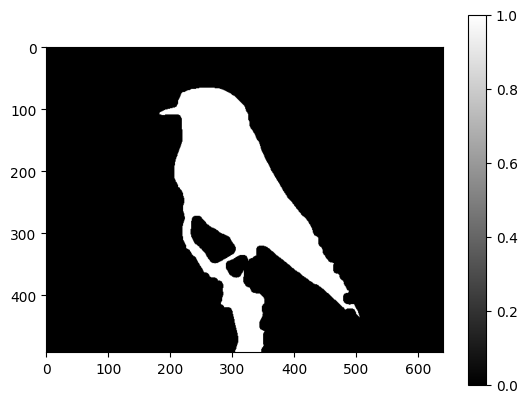

In [39]:
SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(18,18))
bird_mask_clean = cv2.morphologyEx(bird_mask, cv2.MORPH_CLOSE, SE)
imshow(bird_mask_clean)

## c) Immask

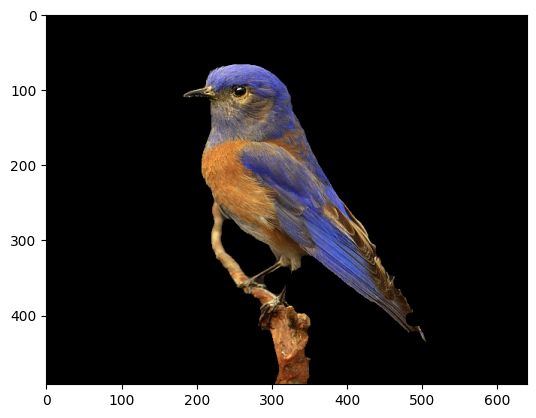

In [41]:
def immask(img, mask):
    mask = np.expand_dims(mask, axis=-1) # zadnjo dimenzijo doda v vektor [y][x][0] -> [y][x][[0]], da lahko mnozimo
    return img * mask

bird_color = imread("images/bird.jpg")
bird_masked = immask(bird_color, bird_mask_clean)
imshow(bird_masked)

## d) Immask eagle

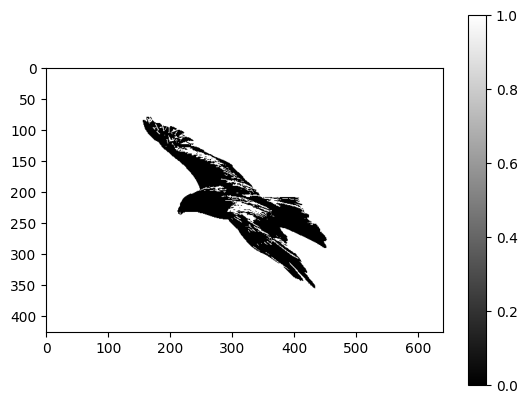

125


In [56]:
eagle = imread('images/eagle.jpg')
eagle_grey = np.asarray(Image.open("images/eagle.jpg").convert("L"))
threshold_3 = otsu(eagle_grey)

eagle_mask = eagle_grey > threshold_3
eagle_masked = immask(eagle, eagle_mask)
imshow(eagle_mask)
print(threshold_3)

A: The object in the front is darker than the background. In general we could compare thresholded areas, or consider the colours in the middle of the image to determine whether or not to invert the mask.

## e) Connected components

192


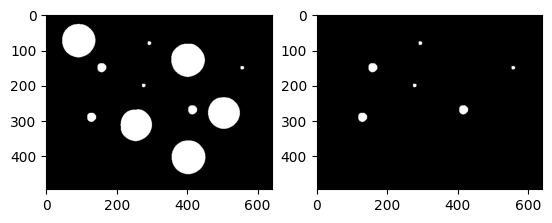

In [57]:
coins = np.asarray(Image.open('images/coins.jpg').convert('L'))
threshold_4 = otsu(coins)
print(threshold_4)

coins_mask = np.where(coins > threshold_4, 0.0, 1.0) # convert from 0..255 to 0.0..1.0 and invert mask

# preform closing
SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
coins_mask = cv2.dilate(coins_mask, SE)
coins_mask = cv2.erode(coins_mask, SE)

# remove coins with large area
coins_removed = coins_mask.copy()
_, labels, stats, _ = cv2.connectedComponentsWithStats(coins_mask.astype('uint8')) # labels = mask with labels 1, 2, 3...
for i, (_, _, _, _, area) in enumerate(stats):
	if area > 700:
		coins_removed[labels == i] = 0


plt.subplot(1, 2, 1)
plt.imshow(coins_mask)
plt.subplot(1, 2, 2)
plt.imshow(coins_removed)

plt.show()